In [10]:
import sys
sys.path.append('/Users/gabesmithline/Desktop/SRG/melo_project/marketsim')
from egta.reductions.dpr import DPRGame
from egta.game import Game

import numpy as np
from collections import defaultdict
from egta.process_data import process_game_data
import random
import numpy as np

'''
test data
'''
#example payoff matrix for 6 agents and 2 strategies
"""
Melo  Lit   
0  6   | 0 50
1  5   | 50 10
2  4   | 30 20
3  3   | 50 50
4  2   | 40 70
5  1   | 10 100
6  0   | 100 0 
"""
#1 for 1 win, 0 for tie, -1 for loss
# 1 -> 2 -> 3 -> 1
rps_data = [ #nash equilibrium is [1/3, 1/3, 1/3] for this data, it is the check data
    [
        ['agent_1', 'ROCK', 0],      
        ['agent_2', 'PAPER', 0],     
        ['agent_3', 'SCISSORS', 0]   
    ],
    
    [
        ['agent_1', 'ROCK', -1],      
        ['agent_2', 'ROCK', -1],      
        ['agent_3', 'PAPER', 2]      
    ],
    
    [
        ['agent_1', 'ROCK', 1],      
        ['agent_2', 'ROCK', 1],      
        ['agent_3', 'SCISSORS', -2] 
    ],
    
    [
        ['agent_1', 'ROCK', -2],     
        ['agent_2', 'PAPER', 1],    
        ['agent_3', 'PAPER', 1]      
    ],
    
    [
        ['agent_1', 'PAPER', -1],    
        ['agent_2', 'PAPER', -1],    
        ['agent_3', 'SCISSORS', 2]   
    ],
    
    [
        ['agent_1', 'ROCK', 2],      
        ['agent_2', 'SCISSORS', -1], 
        ['agent_3', 'SCISSORS', -1]  
    ],
    
    [
        ['agent_1', 'PAPER', -2],    
        ['agent_2', 'SCISSORS', 1], 
        ['agent_3', 'SCISSORS', 1]   
    ],
    
    [
        ['agent_1', 'ROCK', 0],     
        ['agent_2', 'ROCK', 0],
        ['agent_3', 'ROCK', 0]
    ],
    
    [
        ['agent_1', 'PAPER', 0],    
        ['agent_2', 'PAPER', 0],
        ['agent_3', 'PAPER', 0]
    ],
    
    [
        ['agent_1', 'SCISSORS', 0], 
        ['agent_2', 'SCISSORS', 0],
        ['agent_3', 'SCISSORS', 0]
    ]
]



expanded_rps_data = []

distributions = [
    [3, 0, 0], [0, 3, 0], [0, 0, 3],  
    [2, 1, 0], [2, 0, 1], [1, 2, 0], [0, 2, 1], [1, 0, 2], [0, 1, 2],  # Two of one, one of another
    [1, 1, 1], 
]


for _ in range(9000):  
    for dist in distributions:
        profile = []
        strategies = ['ROCK', 'PAPER', 'SCISSORS']
        
        # Create the profile based on distribution
        for i, count in enumerate(dist):
            for _ in range(count):
                # Determine the payoff with the RPS rules plus some small noise
                # Basic payoff
                strat = strategies[i]
                payoff = 0  # Default for ties
                
                # Count other strategies in this profile
                rock_count = dist[0] - (1 if strat == 'ROCK' else 0)
                paper_count = dist[1] - (1 if strat == 'PAPER' else 0)
                scissors_count = dist[2] - (1 if strat == 'SCISSORS' else 0)
                
                # Calculate payoff based on RPS rules
                if strat == 'ROCK':
                    payoff = scissors_count - paper_count
                elif strat == 'PAPER':
                    payoff = rock_count - scissors_count
                elif strat == 'SCISSORS':
                    payoff = paper_count - rock_count
                
                # Add some small noise (but maintain the core relationship)
                noise = np.random.normal(0, 0.1)  # Small Gaussian noise
                payoff = payoff + noise
                
                profile.append([f'agent_{len(profile)+1}', strat, payoff])
        
        expanded_rps_data.append(profile)

expanded_rps_data.extend(rps_data)



## Test data

In [11]:


# Print the size of the dataset
print(f"Generated dataset with {len(rps_data)} profiles")
game_single = process_game_data(expanded_rps_data)
for row in game_single.get_payoff_matrix():
    print(row)



Generated dataset with 10 profiles
['PAPER', 'ROCK', 'SCISSORS']
(('PAPER', 0), ('ROCK', 3), ('SCISSORS', 0))
Repeat profile: (('PAPER', 0), ('ROCK', 3), ('SCISSORS', 0))
Repeat profile: (('PAPER', 3), ('ROCK', 0), ('SCISSORS', 0))
Repeat profile: (('PAPER', 0), ('ROCK', 0), ('SCISSORS', 3))
Repeat profile: (('PAPER', 1), ('ROCK', 2), ('SCISSORS', 0))
Repeat profile: (('PAPER', 0), ('ROCK', 2), ('SCISSORS', 1))
Repeat profile: (('PAPER', 2), ('ROCK', 1), ('SCISSORS', 0))
Repeat profile: (('PAPER', 2), ('ROCK', 0), ('SCISSORS', 1))
Repeat profile: (('PAPER', 0), ('ROCK', 1), ('SCISSORS', 2))
Repeat profile: (('PAPER', 1), ('ROCK', 0), ('SCISSORS', 2))
Repeat profile: (('PAPER', 1), ('ROCK', 1), ('SCISSORS', 1))
[0, 3, 0] [0, -0.00023933218895311526, 0] PAPER
[3, 0, 0] [0.000503868514270386, 0, 0] ROCK
[0, 0, 3] [0, 0, 0.00047167693569869087] SCISSORS
['# PAPER', '# ROCK', '# SCISSORS', 'Payoff (PAPER)', 'Payoff (ROCK)', 'Payoff (SCISSORS)']
[0, 3, 0, 0, -0.00023933218895311526, 0]
[3, 0

In [12]:
dprgame = DPRGame(game_single, game_single.num_players, 3) #approximating 3 players with 2 players in test
print(dprgame.check_reduced_players_ratio())

#returns payos from payoff table in full game
dprgame.reduced_game.full_game.get_numeric_payoff_matrix()



True


array([[ 0.00000000e+00, -2.39332189e-04,  0.00000000e+00],
       [ 5.03868514e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.71676936e-04],
       [ 1.99979522e+00, -9.99329971e-01,  0.00000000e+00],
       [ 0.00000000e+00,  9.99747958e-01, -1.99980078e+00],
       [ 1.00018907e+00, -2.00200206e+00,  0.00000000e+00],
       [-9.99671184e-01,  0.00000000e+00,  2.00139361e+00],
       [ 0.00000000e+00,  2.00206850e+00, -1.00057437e+00],
       [-2.00025846e+00,  0.00000000e+00,  1.00109602e+00],
       [ 5.04468029e-04, -5.69705186e-04,  1.14480060e-03]])

## Check Ratio Validator

Solving game with 3 strategies and 3 players
Iteration 0: [0. 0. 1.]
Final Strategy: [0.31776399 0.30556037 0.37667564]
Regrets: [-27.73815049  20.63919555   8.68190435]
Nash Equilibrium: {'PAPER': 0.3177639885722265, 'ROCK': 0.3055603673794142, 'SCISSORS': 0.37667564404835935}
PAPER [0.0, 0.0, 0.0, 3.9978366280984234, 5.4993732207168815, 6.482432926245787, 6.674879827393503, 6.674879827393503, 6.096489019069223, 4.856547638829755, 3.190884796371767, 0.989221133605716, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1585871868688749, 4.452338159430072, 6.665099042952507, 8.44199683952172, 9.920270504222795, 11.14255858388009, 12.100375238556897, 12.714382116172372, 12.714382116172372, 12.714382116172372, 12.714382116172372, 12.425781331234019, 11.56983640127439, 10.428184531367354, 9.05240450864294, 7.443796829260979, 5.5708433981585515, 3.3581109103511118, 0.6375890108099616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6468039545043762, 4.3606

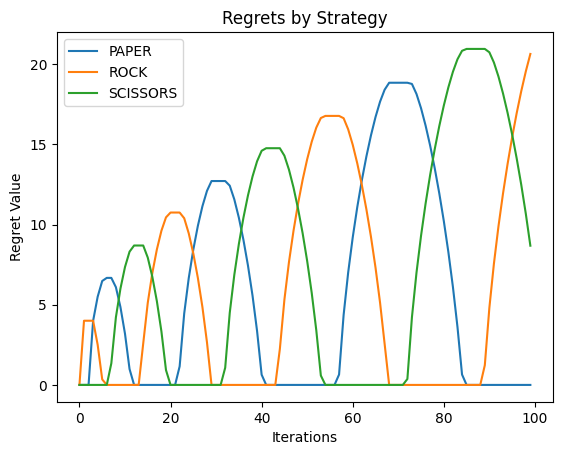

PAPER [0.0, 0.0, 0.0, 0.4996593434563384, 0.6871494411666519, 0.9495256456878332, 1.0, 0.8319765070616765, 0.5914064905871624, 0.44706283046483614, 0.3026170920258743, 0.10639065550056788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09728781135214136, 0.29986846932266664, 0.41365589135445596, 0.5074537714826857, 0.5979218240876478, 0.6965884217492114, 0.8201025421371486, 1.0, 1.0, 1.0, 0.9223154350228168, 0.7342489197230713, 0.6277010543339994, 0.5427030158788335, 0.46488831180713597, 0.3864676169745217, 0.30002477107969594, 0.19406964502778062, 0.041841427027979175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.037124530071839724, 0.20771775371151688, 0.3054172721286689, 0.3804811086370876, 0.445377388135107, 0.5057870014636724, 0.5653458463142368, 0.627231143411335, 0.6951860864816027, 0.7749356037265921, 0.8775479924306852, 1.0, 1.0, 1.0, 1.0, 0.9807232988880122, 0.8163996405222973, 0.7216547768072261, 0.6496218888050741, 0.588358266976116

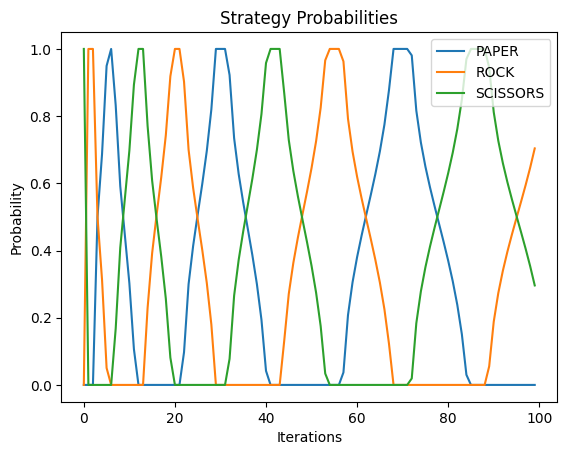

In [ ]:
import matplotlib.pyplot as plt

#TODO: check this is correct
#NOTE: finds nash equilibrium, but regrets and strategy probs seem off?
equilibrium, regrets, strategy_probs = dprgame.solve_reduced_game_cfr(iterations=100)
print("Nash Equilibrium:", equilibrium)
#graph regrets
# Plot regrets for each strategy separately
for key, value in regrets.items():
    print(key, value)
for strategy, regret_values in regrets.items():
    plt.plot(regret_values, label=strategy)
plt.title("Regrets by Strategy")
plt.xlabel("Iterations")
plt.ylabel("Regret Value")
plt.legend()
plt.show()

#graph strategy probabilities

for key, value in strategy_probs.items():
    print(key, value)

for strategy, prob_values in strategy_probs.items():
    plt.plot(prob_values, label=strategy)
plt.title("Strategy Probabilities")
plt.xlabel("Iterations")
plt.ylabel("Probability")
plt.legend()